<a href="https://colab.research.google.com/github/arizky23/Machnine-Learning-Terapan/blob/main/PredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Diri**

---
Nama : Ananda Rizky Nurhidayat

Alamat : Kabupaten Bekasi, Cikarang Selatan

Email : anandakiki1984@gmail.com

SIB Email : M314X0817@dicoding.org

SIB ID : M314X0817

# Introduction :
Topik dalam proyek pertama terkait Predictive Analytic ini membahas terkait Prediksi Harga Penerbangan dengan 12 atribut. Topik ini untuk memenuhi Submission pertama dalam Machine Learning Terapan

# Data Collection

Import library yang dibutuhkan. Anda dapar melakukan di awal atau di tiap kode sel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Kaggle API setup

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Upload API token yang berformat .json

> API token ini bisa kita dapatkan dari web kaggle yang sudah kalian loginkan. Ketika anda sudah login, lalu kalian pergi ke bagian akun anda, anda scroll kebawah dan nanti anda akan menemukan Create New API Token pada bagian API

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anndxrzky","key":"055328affd77b3bc7317c56d11341fa8"}'}

Memindahkan file kaggle.json kedalam config folder

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# gunakan ls untuk melihat apakah sudah masuk kedalam folder atau belum
!ls ~/.kaggle

kaggle.json


Mempersiapkan dataset dengan mengunduhnya melalui website kaggle

In [5]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

100% 4.16M/4.16M [00:00<00:00, 19.8MB/s]
100% 4.16M/4.16M [00:00<00:00, 19.8MB/s]


Melakukan pengekstrakan terhadap dataset dengan menggunakan perintah unzip

In [6]:
!unzip flight-price-prediction.zip

Archive:  flight-price-prediction.zip
  inflating: Clean_Dataset.csv       
  inflating: business.csv            
  inflating: economy.csv             


Membaca file dataset yang telah kita download tadi

In [7]:
df = pd.read_csv('/content/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Output kode di atas memberikan informasi sebagai berikut:
- Terdapat 300.153 baris (records atau jumlah pengamatan) dalam dataset tersebut.
- Terdapat 12 kolom yaitu: Unnamed: 0, airline, flight, source_city, departure_time, destination_city, class, duration, days_left, dan price.

# Data Understanding

> Deskripsi Dataset

Untuk mengecek informasi pada dataset, gunakan fungsi info() sebagai berikut.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Berbagai fitur dari dataset yang dibersihkan dijelaskan di bawah ini:

1. Airline / Maskapai penerbangan: Nama perusahaan penerbangan disimpan di kolom maskapai penerbangan.
2. Flight / Penerbangan: Penerbangan menyimpan informasi mengenai kode penerbangan pesawat.
3. Source City / Sumber Kota: Kota tempat penerbangan lepas landas.
4. Departure Time / Waktu Keberangkatan: Ini menyimpan informasi tentang waktu keberangkatan
5. Stops / Berhenti: Menyimpan jumlah perhentian antara kota sumber dan tujuan.
6. Arrival Time / Waktu Kedatangan: Menyimpan informasi tentang waktu kedatangan.
7. Destination City / Kota Tujuan: Kota tempat penerbangan akan mendarat.
8. Class / Kelas: Fitur kategori yang berisi informasi tentang kelas kursi; dengan dua nilai yang berbeda: Bisnis dan Ekonomi.
9. Duration / Durasi: Jumlah keseluruhan waktu yang diperlukan untuk melakukan perjalanan antar kota dalam hitungan jam.
10. Days Left / Hari Tersisa: Dihitung dengan mengurangi tanggal perjalanan berdasarkan tanggal pemesanan.
11. Price / Harga: Target variabel menyimpan informasi harga tiket.

Drop kolom yang tidak diperlukan

> Dikarenakan Unnamed: 0 tidak memiliki nilai yang dapat kita olah, dan stops yang saya rasa tidak terpakai, maka disini saya akan membuang kedua kolom tersebut dengan perintah sebagai berikut.

In [9]:
df = df.drop(['Unnamed: 0', 'stops'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


Setelah kita drop kolom Unnamed: 0 dan stops, dapat kita lihat outputnya bahwa:

- Terdapat 7 kolom dengan tipe object, yaitu: airline, flight, source_city, departure_time, arrival_time, destination_city, dan class. ini merupakan categorical features (fitur non-numerik).
- Terdapat 1 kolom numerik dengan tipe data float64 yaitu: duration. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 2 kolom numerik dengan tipe data int64, yaitu: days_left dan price. Disini kita akan menargetkan pada kolom price untuk target fitur kita.

Selanjutnya kita akan mengecek deskripsi statistik dari data tersebut dengan fungsi Describe()

In [10]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

Sebelum kita eksekusi, disini saya akan mengecek terlebih dahulu data yang saya dapat, apakah sudah bersih atau masih berantakan.

> Check Missing Value

Dalam proses ini kita akan mengecek nilai dari tiap kolom, apakah ada yang null(kosong) atau tidak. Disini kita gunakan fungsi isna().sum()

In [11]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Dapat kita lihat bahwa setiap tabel tidak memiliki missing value

> Check Unique Value

Selanjutnya, dalam proses ini kita akan mengecek nilai dari tiap kolom, apakah memiliki nilai unik atau tidak. Disini kita gunakan fungsi nunique()

In [12]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

> Check Duplicate

kemudian dalam proses ini kita akan mengecek apakah ada yang terduplikasi dalam tiap kolom. Disini kita gunakan fungsi duplicated().sum()

In [13]:
df.duplicated().sum()

0

Tidak terdapat duplikasi data disini

> Data Size Check

Untuk melihat ukuran data kita gunakan fungsi shape

In [14]:
df.shape

(300153, 10)

Terdapat 300.153 baris (records atau jumlah pengamatan) dan 10 kolom dalam dataset tersebut.

# Univariate Analysis

Disini saya akan menghitung terlebih dahulu dari masing-masing kolom, melihat berapa banyak isi dari kolom tersebut.

> Categorical Features

- Airline

In [15]:
df.groupby('airline')['airline'].agg('count')

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
Name: airline, dtype: int64

- Flight

In [16]:
df.groupby('flight')['flight'].agg('count')

flight
6E-102      39
6E-105       5
6E-113      49
6E-121      20
6E-123       5
          ... 
UK-988    1381
UK-993     911
UK-994    1273
UK-995    1024
UK-996    1266
Name: flight, Length: 1561, dtype: int64

Karena disini flight memiliki banyak sekali nilai unique, maka akan kita lakukan drop fitur.

In [17]:
df = df.drop(['flight'], axis=1)

- Source City

In [18]:
df.groupby('source_city')['source_city'].agg('count')

source_city
Bangalore    52061
Chennai      38700
Delhi        61343
Hyderabad    40806
Kolkata      46347
Mumbai       60896
Name: source_city, dtype: int64

- Departure Time

In [19]:
df.groupby('departure_time')['departure_time'].agg('count')

departure_time
Afternoon        47794
Early_Morning    66790
Evening          65102
Late_Night        1306
Morning          71146
Night            48015
Name: departure_time, dtype: int64

- Arrival Time

In [20]:
df.groupby('arrival_time')['arrival_time'].agg('count')

arrival_time
Afternoon        38139
Early_Morning    15417
Evening          78323
Late_Night       14001
Morning          62735
Night            91538
Name: arrival_time, dtype: int64

- Destination City

In [21]:
df.groupby('destination_city')['destination_city'].agg('count')

destination_city
Bangalore    51068
Chennai      40368
Delhi        57360
Hyderabad    42726
Kolkata      49534
Mumbai       59097
Name: destination_city, dtype: int64

- Class

In [22]:
df.groupby('class')['class'].agg('count')

class
Business     93487
Economy     206666
Name: class, dtype: int64

Kita lihat kembali dataset tersebut dengan fungsi head() sebagai berikut.

In [24]:
df.head()

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,Morning,Mumbai,Economy,2.33,1,5955


Dan kita akan mengecek kembali informasi pada dataset tersebut dengan fungsi info() sebagai berikut.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   arrival_time      300153 non-null  object 
 4   destination_city  300153 non-null  object 
 5   class             300153 non-null  object 
 6   duration          300153 non-null  float64
 7   days_left         300153 non-null  int64  
 8   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 20.6+ MB


> Separation of features

Selanjutnya, akan kita bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [26]:
numerical_features = ['duration', 'days_left', 'price']
categorical_features = ['airline', 'source_city','departure_time', 'arrival_time', 'destination_city', 'class']

> Numerical Features

Untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya menggunakan code berikut.

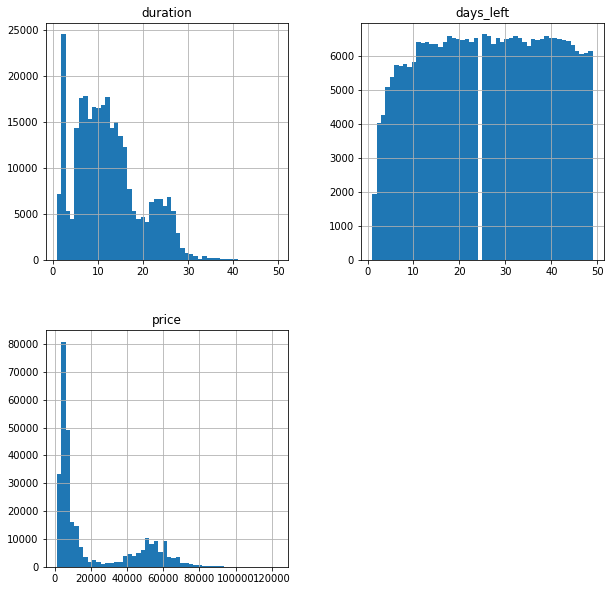

In [27]:
df.hist(bins=50, figsize=(10,10))
plt.show()

Grafik diatas memiliki distribusi yang banyak

# Multivariate Analysis

> Categorical Features

Pada tahap ini, kita akan mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

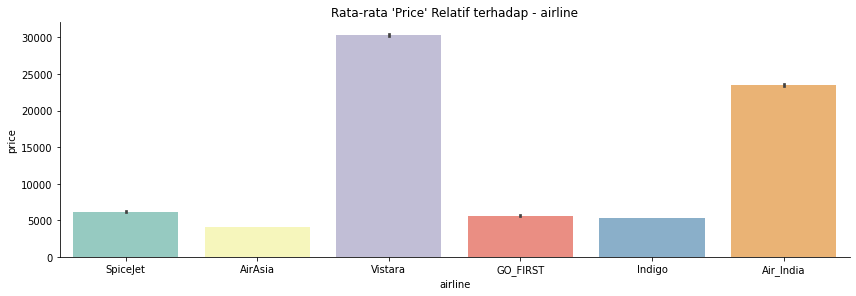

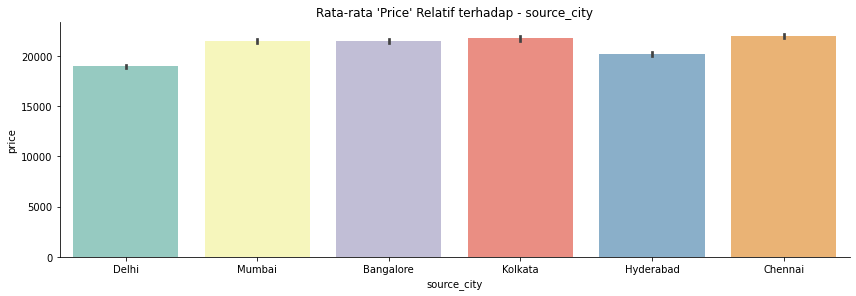

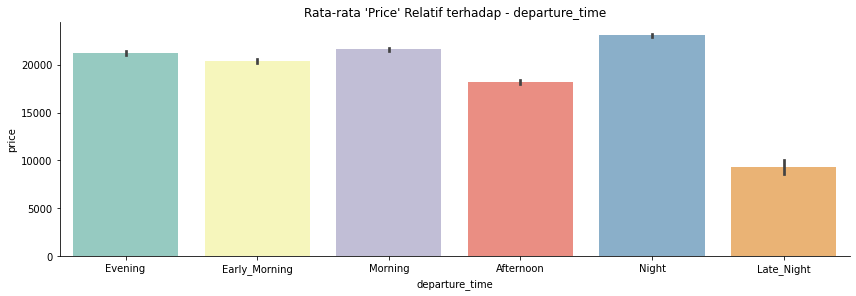

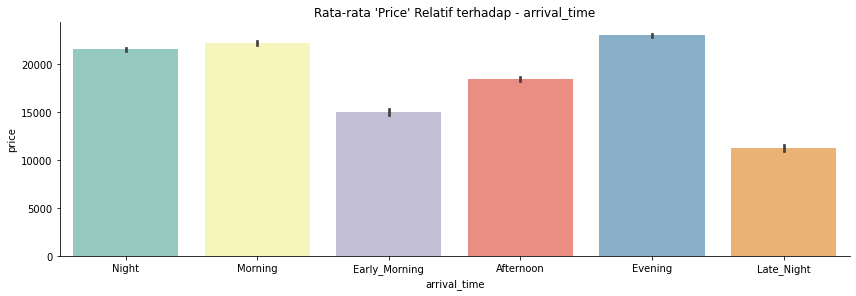

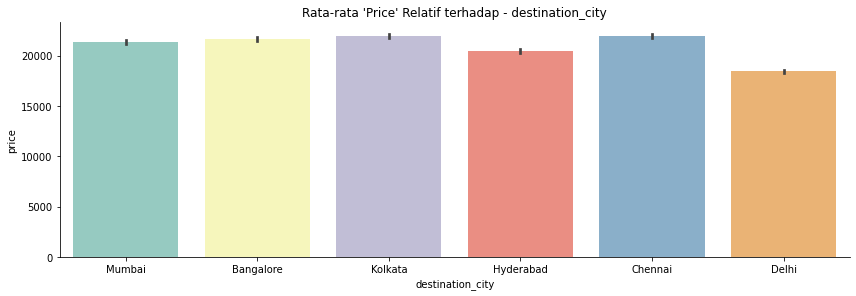

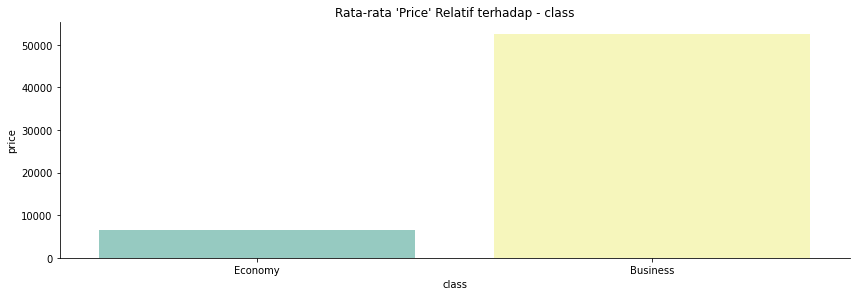

In [28]:
# Melihat kolerasi antara fitur kategorik dengan fitur target (harga)
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:
- Pada fitur ‘airline’, rata-rata harga cenderung tak beraturan. Grade tertinggi yaitu grade Vistara memiliki harga 30000 lebih tinggi diantara grade lainnya. Sehingga, fitur airline memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur ‘source_city’, rata-rata harga cenderung mirip. Rentangnya berada antara 18000 hingga 30000. Dari sini dapat disimpulkan bahwa kota tempat penerbangan lepas landas memiliki pengaruh yang rendah terhadap harga.
- Pada fitur ‘departure time’, waktu keberangkatan sedikit berpengaruh terhadapt harga.
- Pada fitur ‘arrival time’, waktu kedatangan cenderung lebih berpengeruh terhadap harga.
- Pada fitur ‘destination city’, rata-rata harganya cenderung mirip. Rentangnya berada di antara 18000 hingga 25000.
- Pada fitur ‘class’, dapat kita lihat bahwa class yang ada pada business lebih tinggi harganya dibanding dengan economy. Ini sangat berpengaruh terhadap harga, sebab dari kedua kategori tersebut memiliki fasilitas yang berbeda.

Kesimpulan akhir, fitur kategori ini memiliki pengaruh yang signifikan terhadap harga.

> Numerical Features

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot() sebagai berikut.

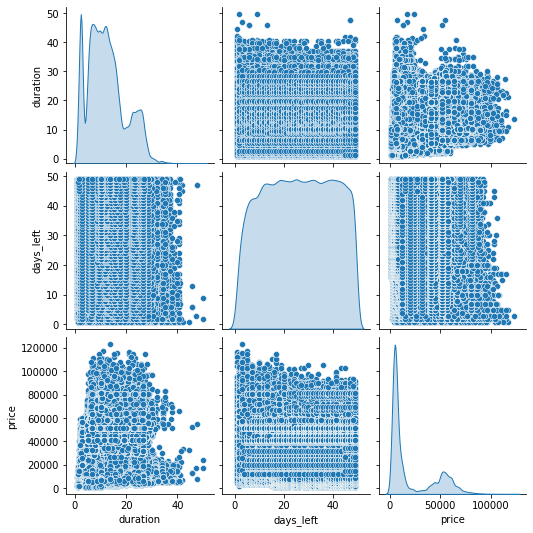

In [29]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

> Check Correlation

Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

Text(0.5, 1.0, 'Correlation Matrix for Numerical Features')

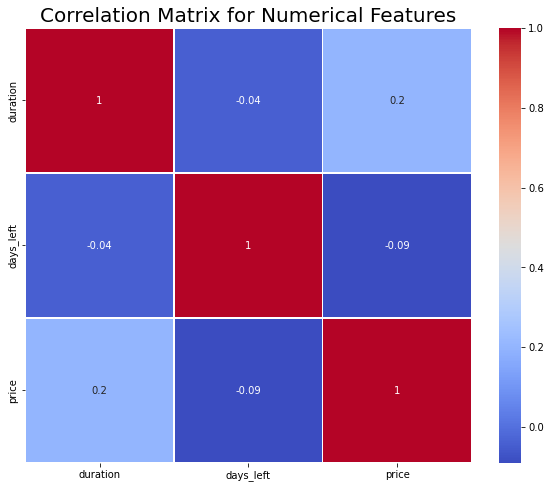

In [30]:
# Untuk mengevaluasi skor korelasinya, kita gunakan fungsi corr()
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix for Numerical Features", size=20)

Jika kita amati, fitur ‘duration’ memiliki skor korelasi yang besar berada di 0.22 dengan fitur target ‘price’. Sementara itu, fitur ‘days_left’ memiliki korelasi yang sangat kecil yaitu -0.09. Sehingga, fitur tersebut dapat di-drop.

In [31]:
df.drop(['days_left'], inplace=True, axis=1)
df.head()

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,price
0,SpiceJet,Delhi,Evening,Night,Mumbai,Economy,2.17,5953
1,SpiceJet,Delhi,Early_Morning,Morning,Mumbai,Economy,2.33,5953
2,AirAsia,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,2.17,5956
3,Vistara,Delhi,Morning,Afternoon,Mumbai,Economy,2.25,5955
4,Vistara,Delhi,Morning,Morning,Mumbai,Economy,2.33,5955


# Check Outliers

Pada tahap ini, kita akan menangani outliers pada fitur numerik.

> Menjabarkan outliers

Disini kita menggunakan library seaborn dengan fungsi boxplot, untuk kodenya sebagai berikut.

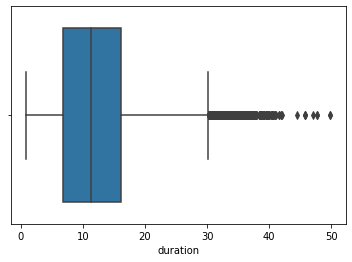

In [32]:
# duration
sns.boxplot(x=df['duration'])

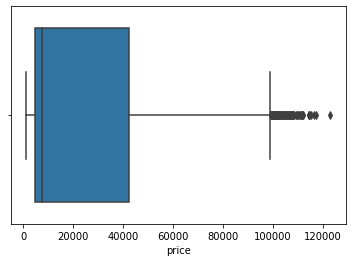

In [34]:
# price
sns.boxplot(x=df['price'])

Jika kita perhatikan kembali, pada beberapa fitur numerik di atas terdapat outliers. Kita akan mengatasi outliers tersebut dengan menggunakan metode IQR. Menggunakan metode IQR ini tujuannya untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini akan dianggap sebagai outlier. 

> Mengatasi outliers menggunakan metode IQR

Hal pertama yang perlu Kita perhatikan adalah membuat batas bawah dan batas atas. Untuk membuat batas bawah, kurangi Q1 dengan 1,5 * IQR. Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3.

Berikut persamaannya:
- Batas bawah = Q1 - 1.5 * IQR
- Batas atas = Q3 + 1.5 * IQR

Mari kita terapkan persamaan ini ke dalam kode berikut.

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# cek ukuran dataset setelah kita drop outliers
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(297920, 8)

# Data Preparation

> One Hot Encoding

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding. Library scikit-learn menyediakan fungsi ini untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori. Kita memiliki enam variabel kategori dalam dataset kita, yaitu ‘airline’, ‘source_city’, ‘departure_time’, ‘arrival_time’, ‘destination_city’, dan ‘class’.

In [36]:
# Mari kita lakukan proses encoding ini dengan fitur get_dummies.
from sklearn.preprocessing import OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['airline'], prefix='airline')],axis=1)
df = pd.concat([df, pd.get_dummies(df['source_city'], prefix='source_city')],axis=1)
df = pd.concat([df, pd.get_dummies(df['departure_time'], prefix='departure_time')],axis=1)
df = pd.concat([df, pd.get_dummies(df['arrival_time'], prefix='arrival_time')],axis=1)
df = pd.concat([df, pd.get_dummies(df['destination_city'], prefix='destination_city')],axis=1)
df = pd.concat([df, pd.get_dummies(df['class'], prefix='class')],axis=1)
df.drop(['airline','source_city','departure_time', 'arrival_time', 'destination_city', 'class'], axis=1, inplace=True)
df.head()

,duration,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,5953,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,5953,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,5956,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,5955,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,5955,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


Sekarang, variabel kategori kita telah berubah menjadi variabel numerik

> Train Test Split

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model. Kita perlu mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru.

Ketahuilah bahwa setiap transformasi yang kita lakukan pada data juga merupakan bagian dari model. Karena data uji (test set) berperan sebagai data baru, kita perlu melakukan semua proses transformasi dalam data latih. Inilah alasan mengapa langkah awal adalah membagi dataset sebelum melakukan transformasi apa pun. Tujuannya adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih. 

In [37]:
# kita akan membagi dataset sebesar 70:30 dengan fungsi train_test_split dari sklearn.
from sklearn.model_selection import train_test_split

X = df.drop(["price"],axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [38]:
# untuk mengecek jumlah sampel pada masing-masing bagian, kita gunakan kode berikut
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 297920
Total # of sample in train dataset: 208544
Total # of sample in test dataset: 89376


> Standarisasi

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [39]:
# Mari kita terapkan StandardScaler pada data.
from sklearn.preprocessing import StandardScaler

# Kita akan menormalisasikan data pada data train
numerical_features = ['duration']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,duration
103449,-0.535750
269594,-0.225494
261658,1.001237
151529,0.143383
53332,-1.500836


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1.

In [40]:
# Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi, jalankan kode ini:
X_train[numerical_features].describe().round(4)

,duration
count,208544.0000
mean,-0.0000
std,1.0000
min,-1.6081
25%,-0.7617
50%,-0.1297
75%,0.5609
max,2.5868


Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

# Modeling Development

Pada tahap ini kita akan membuat tiga buah model machine learning dengan algoritma berikut:

- K-Nearest Neighbor (KNN)
- Random Forest
- Boosting Algorithm

In [41]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['accuracy'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['accuracy','knn'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['accuracy', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [44]:
# untuk menerapkan model pada dataset, implementasikan code berikut.
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['accuracy', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

Sebelum menghitung nilai MSE dalam model, kita perlu melakukan proses scaling fitur numerik pada data uji. Sebelumnya, kita baru melakukan proses scaling pada data latih untuk menghindari kebocoran data.

Sekarang, setelah model selesai dilatih dengan 3 algoritma, yaitu KNN, Random Forest, dan Adaboost, kita perlu melakukan proses scaling terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

Untuk proses scaling, implementasikan kode berikut:

In [45]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Selanjutnya, mari kita evaluasi ketiga model kita dengan metrik MSE yang telah dijelaskan di atas. Jalankan kode berikut.

In [47]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,13684.968264,15261.179694
RF,13311.047334,14410.958053
Boosting,36444.675468,36242.291304


Perhatikanlah potongan kode di atas. Saat menghitung nilai Mean Squared Error pada data train dan test, kita membaginya dengan nilai 1e3. Hal ini bertujuan agar nilai mse berada dalam skala yang tidak terlalu besar.

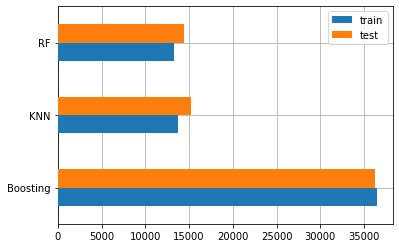

In [48]:
# Membuat plot metrik tersebut dengan bar chart.
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 35000). Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga penerbangan.

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test.

In [52]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
12870,7089,7487.0,6050.3,7233.2
194096,3362,2342.1,2164.5,3563.7
132255,3379,3541.0,3826.8,4865.6
260272,60396,60900.9,59058.3,49521.1
215088,57017,57017.0,55307.1,58894.8
